# Data Analysis Examples

[Jian Tao](https://coehpc.engr.tamu.edu/people/jian-tao/), Texas A&M University

Aug 10, 2019

Converted from 

**pandas workshop notebook** 

by [Luciano Strika](https://github.com/StrikingLoo/pandas_workshop)

## 1. Data exploration with panda

In [1]:
import pandas as pd
import random

### First, we will generate a data set randomly

In [2]:
names = ["Albert","John","Richard","Henry","William"]
surnames = ["Goodman","Black","White","Green","Joneson"]
gender = ["F", "M"]
salaries = [500*random.randint(10,30) for _ in range(10)]

In [3]:
def generate_random_person(names, surnames, gender, salaries):
    return {"name":random.sample(names,1)[0],
            "surname":random.sample(surnames,1)[0],
            "gender":random.sample(gender,1)[0],
            "salary":random.sample(salaries,1)[0]}
def generate_people(k):
    return [generate_random_person(names, surnames, gender, salaries) for _ in range(k)]

In [4]:
generate_random_person(names, surnames, gender, salaries)

{'name': 'Henry', 'surname': 'White', 'gender': 'M', 'salary': 14500}

In [5]:
df = pd.DataFrame(generate_people(50),columns=["name","surname", "gender", "salary"])

In [6]:
df.to_csv("random_people.csv")

### Now we are going to use the data

In [7]:
df = pd.read_csv("random_people.csv")

In [8]:
#start getting a feel of the data
df.head(5)

,Unnamed: 0,name,surname,gender,salary
0,0,William,Green,M,5000
1,1,William,Goodman,M,8000
2,2,William,Joneson,F,7000
3,3,William,Green,M,14500
4,4,William,Joneson,F,14500


In [9]:
df['salary'].value_counts()

14500    12
5000     11
7000     10
8000      6
9000      5
11500     3
7500      3
Name: salary, dtype: int64

In [10]:
df['salary'].median()

8000.0

In [11]:
def tax(s):
    if s>=6000:
        return s*.7
    else:
        return s*.85

In [12]:
df["salary_after_tax"] = df["salary"].apply(tax)
df.head(5)

,Unnamed: 0,name,surname,gender,salary,salary_after_tax
0,0,William,Green,M,5000,4250.0
1,1,William,Goodman,M,8000,5600.0
2,2,William,Joneson,F,7000,4900.0
3,3,William,Green,M,14500,10150.0
4,4,William,Joneson,F,14500,10150.0


In [13]:
df_high = df[df["salary_after_tax"]>10000]

In [14]:
df_high

,Unnamed: 0,name,surname,gender,salary,salary_after_tax
3,3,William,Green,M,14500,10150.0
4,4,William,Joneson,F,14500,10150.0
9,9,Henry,Black,F,14500,10150.0
13,13,Albert,White,M,14500,10150.0
14,14,John,Goodman,F,14500,10150.0
16,16,Richard,Black,M,14500,10150.0
20,20,William,Goodman,M,14500,10150.0
21,21,Henry,Black,F,14500,10150.0
23,23,William,White,F,14500,10150.0
32,32,Richard,Goodman,F,14500,10150.0


In [15]:
df.corr()["salary"].sort_values()

Unnamed: 0         -0.182054
salary_after_tax    0.994052
salary              1.000000
Name: salary, dtype: float64

## 2. Wordcloud of "The Complete Works of William Shakespeare"

Project Gutenberg’s [The Complete Works of William Shakespeare, by William
Shakespeare](https://www.gutenberg.org/files/100/100-0.txt)

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.  If you are not located in the United States, you’ll
have to check the laws of the country where you are located before using
this ebook.

In [16]:
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS

In [17]:
import requests 
url = 'http://raw.githubusercontent.com/jtao/tamids/master/bootcamp2019/intro_to_ds/case1.1/Shakespeare.txt'
site = requests.get(url)
text = site.text

#text = urllib.request.urlopen(url)
#print(text)

In [18]:
','.join(STOPWORDS)

"because,when,he,any,then,who's,so,myself,can't,couldn't,hasn't,he'll,themselves,our,www,is,his,i've,same,has,itself,they've,you,doesn't,them,he'd,cannot,ourselves,be,further,here,my,hadn't,those,again,who,since,ever,but,she's,against,a,however,com,they'd,each,how,these,your,most,haven't,own,get,are,both,than,her,how's,of,and,into,other,some,once,if,it,like,why,there's,shouldn't,were,wouldn't,about,after,k,mustn't,for,me,himself,more,when's,was,had,we'd,they'll,just,let's,shan't,don't,should,their,where's,too,else,wasn't,do,from,you'll,ought,before,hers,nor,all,she'll,being,below,am,shall,few,been,whom,by,they're,weren't,i'll,you're,can,didn't,r,it's,having,ours,won't,where,its,what,during,herself,off,him,up,would,that's,this,we,with,such,as,http,that,until,the,we've,you'd,she,over,between,theirs,only,what's,on,down,we're,under,yourself,or,i,have,at,not,which,doing,isn't,he's,in,out,to,we'll,also,does,aren't,otherwise,while,very,she'd,an,yours,why's,above,there,you've,no,did,here's,the

In [19]:
text.strip().replace("\n", " ").replace("\r", " ");
print ("There are {} words in the collection.".format(len(text)))

There are 5750559 words in the collection.


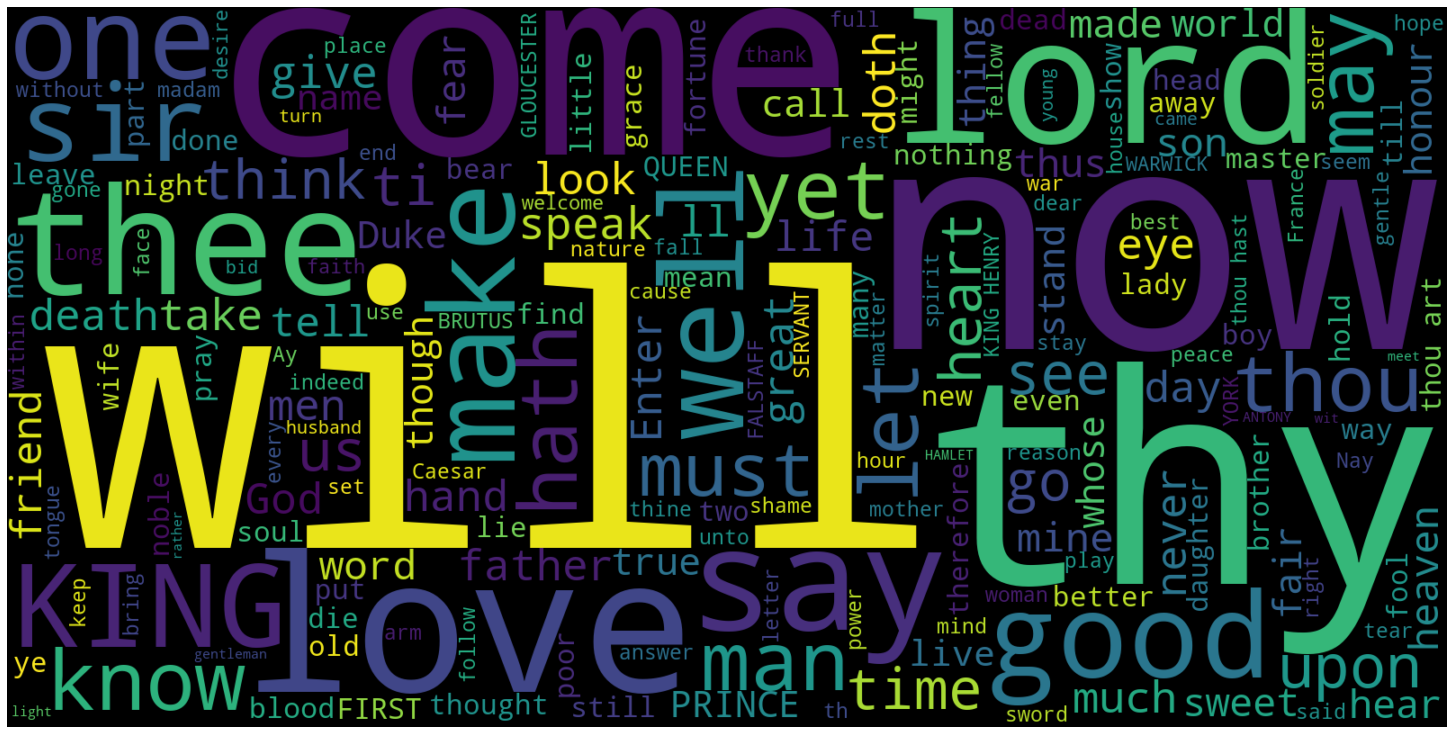

In [20]:
wordcloud = WordCloud(width=1600, height=800, 
                      stopwords=STOPWORDS, 
                      background_color='black'
                     ).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, 
           interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [21]:
# Ucomment to save the word cloud to a file.
#wordcloud.to_file("wordcloud.png")